# Laboratory Work #3: Comparative Analysis of Classification Models

**Topic:** Application and comparative evaluation of Logistic Regression, SVM, and Random Forest algorithms for binary classification task.

**Dataset:** Wisconsin Breast Cancer (sklearn built-in)

**Objectives:**
1. Understand the importance of feature scaling
2. Compare different classification algorithms
3. Evaluate models using multiple metrics
4. Perform comprehensive analysis and visualization

## 1. Imports and Setup

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Data Loading

We use the **Wisconsin Breast Cancer** dataset:
- **Task:** Binary classification (malignant vs benign tumor)
- **Features:** 30 numerical features from digitized images
- **Samples:** 569 total

In [57]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(f"Dataset shape: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Target classes: {data.target_names}")
print(f"\nClass distribution:")
print(f"  0 (malignant): {(y==0).sum()} samples ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  1 (benign): {(y==1).sum()} samples ({(y==1).sum()/len(y)*100:.1f}%)")

Dataset shape: 569 samples, 30 features
Target classes: ['malignant' 'benign']

Class distribution:
  0 (malignant): 212 samples (37.3%)
  1 (benign): 357 samples (62.7%)


## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview

In [58]:
print("First 5 rows of the dataset:")
X.head()

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
print("Dataset information:")
X.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [60]:
print("Statistical summary (first 5 features):")
X.describe().loc[['mean', 'std', 'min', 'max']].iloc[:, :5]

Statistical summary (first 5 features):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
max,28.110000,39.280000,188.500000,2501.000000,0.163400


### 3.2 Feature Scale Analysis

**Critical observation:** Features exist on very different scales!
- `mean radius` ≈ 14
- `mean area` ≈ 654
- `mean smoothness` ≈ 0.09

This makes **feature scaling essential** for distance-based algorithms.

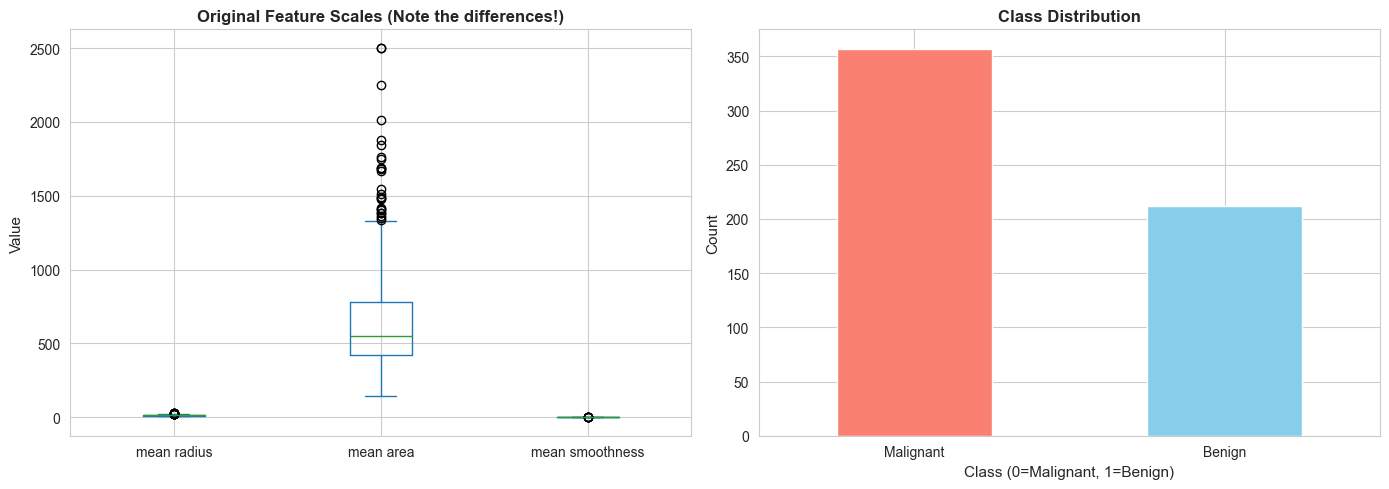

✓ The boxplot clearly shows features are on different scales
✓ Classes are relatively balanced (no major imbalance issue)


In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

selected_features = ['mean radius', 'mean area', 'mean smoothness']
X[selected_features].plot(kind='box', ax=axes[0])
axes[0].set_title('Original Feature Scales (Note the differences!)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Value', fontsize=11)

y.value_counts().plot(kind='bar', ax=axes[1], color=['salmon', 'skyblue'])
axes[1].set_title('Class Distribution', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Class (0=Malignant, 1=Benign)', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_xticklabels(['Malignant', 'Benign'], rotation=0)

plt.tight_layout()
plt.show()

print("✓ The boxplot clearly shows features are on different scales")
print("✓ Classes are relatively balanced (no major imbalance issue)")

## 4. Data Preparation

### 4.1 Train/Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTrain class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")

Training set: 455 samples
Test set: 114 samples

Train class distribution: {1: 285, 0: 170}
Test class distribution: {1: 72, 0: 42}


### 4.2 Feature Scaling

**Important:** 
- Fit scaler **only** on training data
- Transform both training and test data with the same scaler
- This prevents data leakage

Feature scaling results (example: 'mean radius'):
  Mean before scaling: 14.0672
  Mean after scaling: -0.0000
  Std before scaling: 3.4994
  Std after scaling: 1.0000

✓ After scaling: mean ≈ 0, std ≈ 1


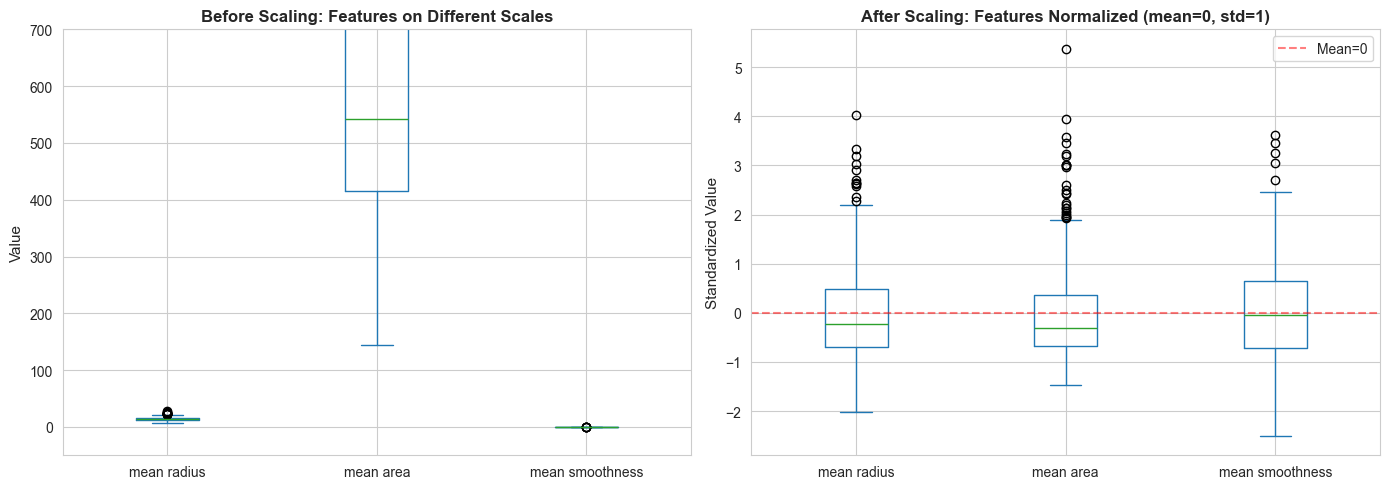


✓ Visual comparison shows how scaling brings all features to the same scale


In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling results (example: 'mean radius'):")
print(f"  Mean before scaling: {X_train['mean radius'].mean():.4f}")
print(f"  Mean after scaling: {X_train_scaled[:, 0].mean():.4f}")
print(f"  Std before scaling: {X_train['mean radius'].std():.4f}")
print(f"  Std after scaling: {X_train_scaled[:, 0].std():.4f}")
print("\n✓ After scaling: mean ≈ 0, std ≈ 1")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

selected_features = ['mean radius', 'mean area', 'mean smoothness']
selected_indices = [X.columns.get_loc(f) for f in selected_features]
df_before = pd.DataFrame(X_train[selected_features], columns=selected_features)
df_before.plot(kind='box', ax=axes[0])
axes[0].set_title('Before Scaling: Features on Different Scales', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Value', fontsize=11)
axes[0].set_ylim(-50, 700)

df_after = pd.DataFrame(X_train_scaled[:, selected_indices], columns=selected_features)
df_after.plot(kind='box', ax=axes[1])
axes[1].set_title('After Scaling: Features Normalized (mean=0, std=1)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Standardized Value', fontsize=11)
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Mean=0')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n✓ Visual comparison shows how scaling brings all features to the same scale")

## 5. Model Evaluation Function

This function trains a model and computes all relevant metrics.

In [64]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Train and evaluate a model, returning comprehensive metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_proba = None
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_proba = model.decision_function(X_test)
    
    return {
        'predictions': y_pred,
        'probabilities': y_proba,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

print("✓ Evaluation function defined")

✓ Evaluation function defined


## 6. Demonstrating the Impact of Feature Scaling

**Key experiment:** Train models with and without scaling to show the difference.

This is critical for understanding why preprocessing matters!

In [65]:
models_to_test = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
}

scaling_impact = []
for name, model_template in models_to_test.items():
    if 'Logistic' in name:
        model_unscaled = LogisticRegression(max_iter=10000, random_state=42)
    else:
        model_unscaled = SVC(kernel='linear', random_state=42)
    result_unscaled = evaluate_model(model_unscaled, X_train.values, X_test.values, y_train, y_test)
    
    if 'Logistic' in name:
        model_scaled = LogisticRegression(max_iter=10000, random_state=42)
    else:
        model_scaled = SVC(kernel='linear', random_state=42)
    result_scaled = evaluate_model(model_scaled, X_train_scaled, X_test_scaled, y_train, y_test)
    
    scaling_impact.append({
        'Model': name,
        'Accuracy (Unscaled)': result_unscaled['accuracy'],
        'Accuracy (Scaled)': result_scaled['accuracy'],
        'Improvement': result_scaled['accuracy'] - result_unscaled['accuracy']
    })

scaling_df = pd.DataFrame(scaling_impact)
print("Impact of Feature Scaling on Model Performance:")
print("="*70)
display(scaling_df)
print(f"\nAverage improvement from scaling: {scaling_df['Improvement'].mean():+.2%}")
print("\n✓ This demonstrates why scaling is CRITICAL for distance-based algorithms!")

Impact of Feature Scaling on Model Performance:


,Model,Accuracy (Unscaled),Accuracy (Scaled),Improvement
0,Logistic Regression,0.964912,0.982456,0.017544
1,SVM (Linear),0.956140,0.973684,0.017544



Average improvement from scaling: +1.75%

✓ This demonstrates why scaling is CRITICAL for distance-based algorithms!


## 7. Training All Models

Now let's train all four model variants:
1. **Logistic Regression** (linear, scaled data)
2. **SVM with Linear kernel** (scaled data)
3. **SVM with RBF kernel** (scaled data)
4. **Random Forest** (unscaled data - trees don't need scaling)

In [66]:
models = {
    'Logistic Regression': (LogisticRegression(max_iter=10000, random_state=42), X_train_scaled, X_test_scaled),
    'SVM (Linear)': (SVC(kernel='linear', probability=True, random_state=42), X_train_scaled, X_test_scaled),
    'SVM (RBF)': (SVC(kernel='rbf', probability=True, random_state=42), X_train_scaled, X_test_scaled),
    'Random Forest': (RandomForestClassifier(random_state=42, n_estimators=100), X_train.values, X_test.values),
}

results = {}
print("Training models...\n")
for name, (model, X_tr, X_te) in models.items():
    print(f"Training {name}...")
    results[name] = evaluate_model(model, X_tr, X_te, y_train, y_test)
    print(f"  → Accuracy: {results[name]['accuracy']:.4f}, F1-Score: {results[name]['f1']:.4f}")

print("\n✓ All models trained successfully")

Training models...

Training Logistic Regression...
  → Accuracy: 0.9825, F1-Score: 0.9861
Training SVM (Linear)...
  → Accuracy: 0.9737, F1-Score: 0.9790
Training SVM (RBF)...
  → Accuracy: 0.9825, F1-Score: 0.9861
Training Random Forest...
  → Accuracy: 0.9561, F1-Score: 0.9655

✓ All models trained successfully


## 8. Comprehensive Visualization Dashboard

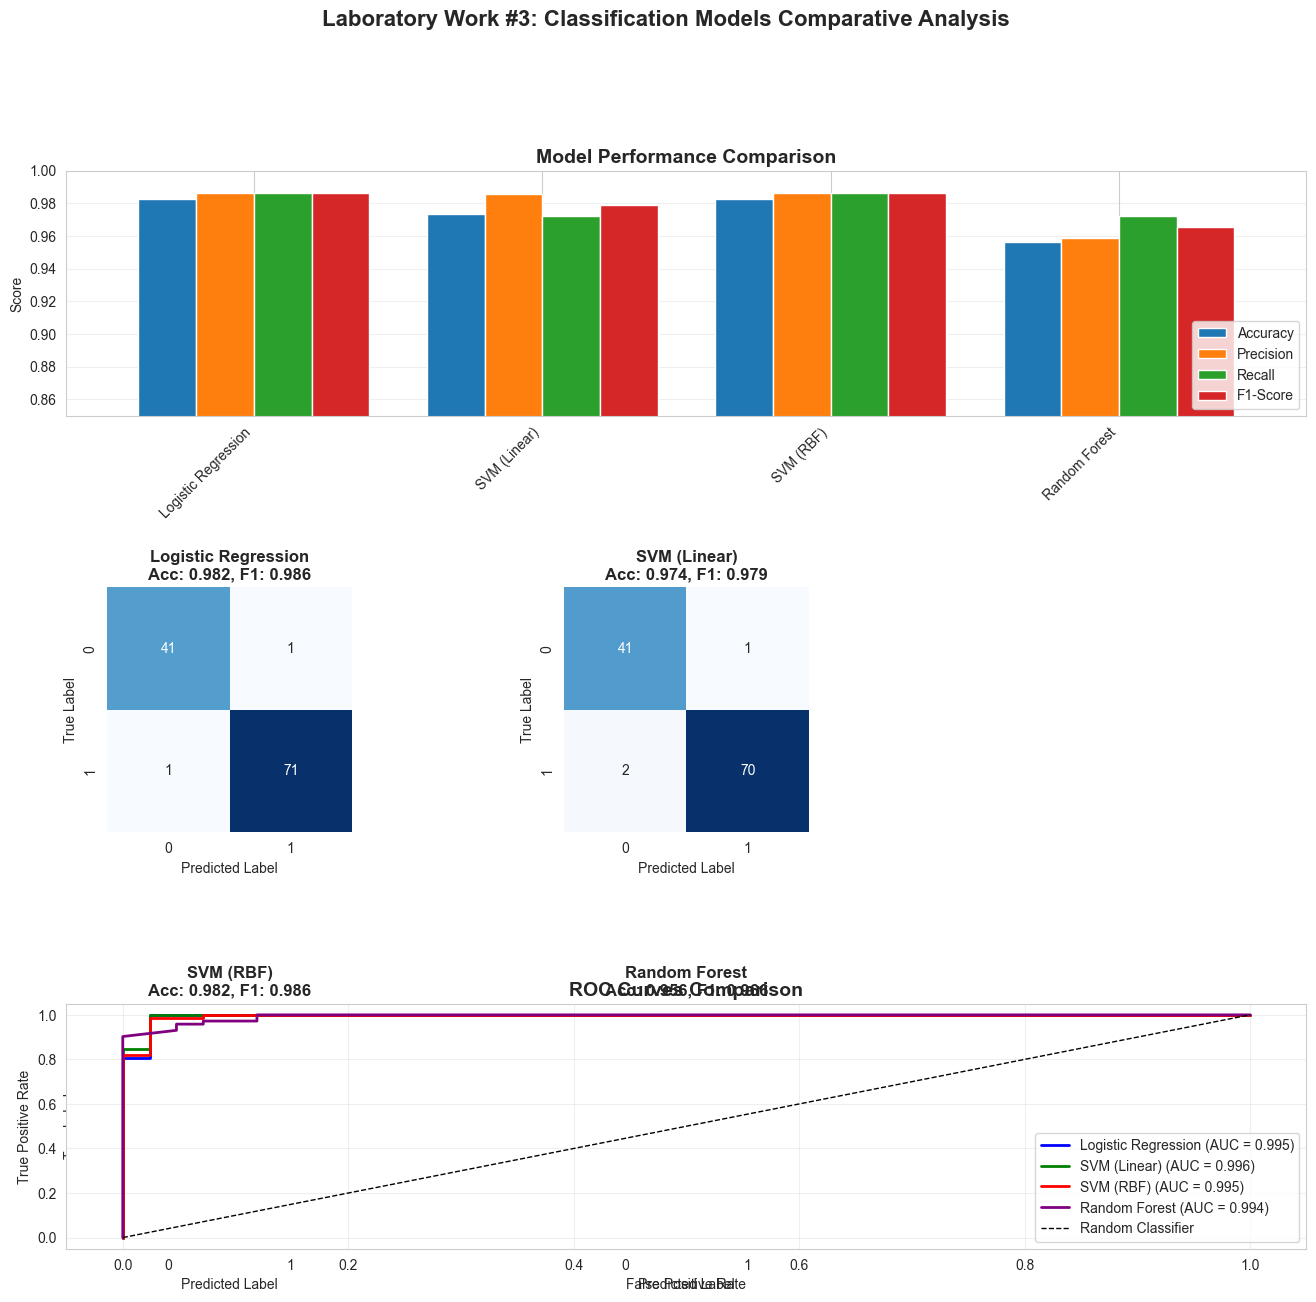


⚕️ Medical Context Note:
In cancer diagnosis, minimizing False Negatives (missed cancers) is CRITICAL.
A False Negative means telling a patient they don't have cancer when they do.


In [67]:
fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(3, 3, hspace=0.7, wspace=0.4)

ax1 = fig.add_subplot(gs[0, :])
metrics_df = pd.DataFrame({
    name: {
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall'],
        'F1-Score': res['f1']
    } for name, res in results.items()
}).T
metrics_df.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Score')
ax1.set_ylim(0.85, 1.0)
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

for idx, (name, res) in enumerate(results.items()):
    row = 1 + idx // 2
    col = idx % 2
    ax = fig.add_subplot(gs[row, col])
    sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True)
    ax.set_title(f'{name}\nAcc: {res["accuracy"]:.3f}, F1: {res["f1"]:.3f}',
                 fontweight='bold')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

ax_roc = fig.add_subplot(gs[2, :])
colors = ['blue', 'green', 'red', 'purple']
for (name, res), color in zip(results.items(), colors):
    if res['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, res['probabilities'])
        roc_auc = auc(fpr, tpr)
        ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})',
                   linewidth=2, color=color)

ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax_roc.legend(loc='lower right')
ax_roc.grid(alpha=0.3)

plt.suptitle('Laboratory Work #3: Classification Models Comparative Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n⚕️ Medical Context Note:")
print("In cancer diagnosis, minimizing False Negatives (missed cancers) is CRITICAL.")
print("A False Negative means telling a patient they don't have cancer when they do.")

## 9. Feature Importance Analysis

Random Forest provides feature importance scores - let's see which features matter most.

Top 10 Most Important Features (Random Forest):


,feature,importance
23,worst area,0.140016
27,worst concave points,0.129530
20,worst radius,0.097696
7,mean concave points,0.090885
22,worst perimeter,0.072226
2,mean perimeter,0.069574
0,mean radius,0.068676
6,mean concavity,0.057638
3,mean area,0.049172
26,worst concavity,0.034340


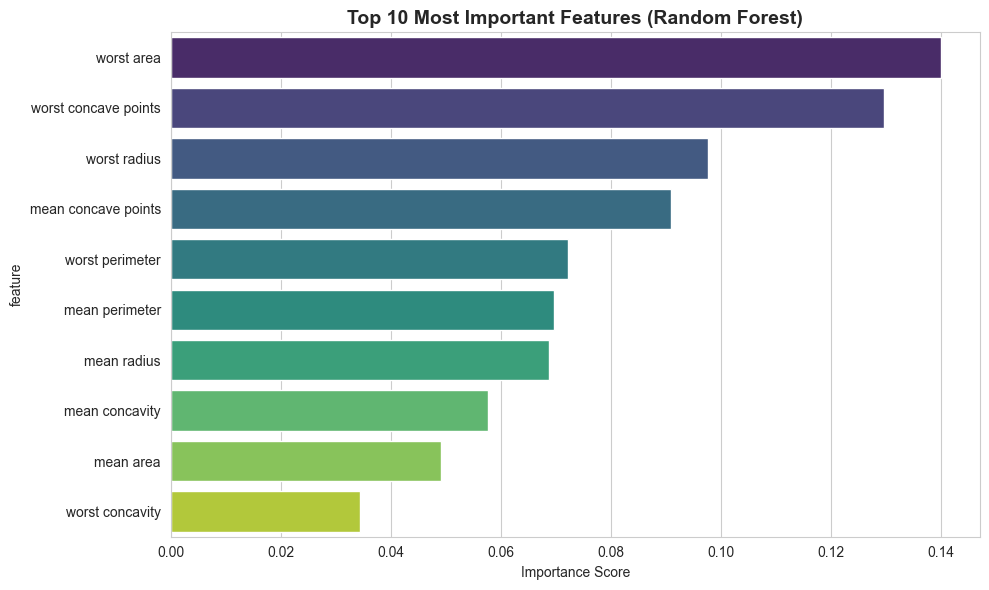

In [68]:
rf_model = models['Random Forest'][0]
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features (Random Forest):")
display(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## 10. Final Comparative Analysis

### 10.1 Performance Summary Table

In [69]:
summary = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [r['accuracy'] for r in results.values()],
    'Precision': [r['precision'] for r in results.values()],
    'Recall': [r['recall'] for r in results.values()],
    'F1-Score': [r['f1'] for r in results.values()],
})

styled_summary = summary.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
                                              color='lightgreen', axis=0)
display(styled_summary)

best_idx = summary['F1-Score'].idxmax()
best_model = summary.loc[best_idx, 'Model']
best_f1 = summary.loc[best_idx, 'F1-Score']

print(f"\n{'='*70}")
print(f"✓ Best Performing Model: {best_model}")
print(f"  F1-Score: {best_f1:.4f}")
print(f"  Accuracy: {summary.loc[best_idx, 'Accuracy']:.4f}")
print(f"  Recall: {summary.loc[best_idx, 'Recall']:.4f} (Critical for medical diagnosis!)")
print(f"{'='*70}")

print(f"\nDetailed Classification Report for {best_model}:")
print("="*70)
best_model_obj = models[best_model][0]
X_best_test = models[best_model][2]
y_pred_best = best_model_obj.predict(X_best_test)
print(classification_report(y_test, y_pred_best, target_names=['Malignant', 'Benign']))

cm = results[best_model]['confusion_matrix']
tn, fp, fn, tp = cm.ravel()
print(f"Confusion Matrix Breakdown:")
print(f"  True Negatives (TN):  {tn} - Correctly identified malignant tumors")
print(f"  False Positives (FP): {fp} - Benign tumors incorrectly classified as malignant")
print(f"  False Negatives (FN): {fn} - ⚠️ CRITICAL: Malignant tumors missed!")
print(f"  True Positives (TP):  {tp} - Correctly identified benign tumors")
print(f"\n⚕️  In medical context: {fn} patient(s) would be incorrectly told they're cancer-free.")

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.982456,0.986111,0.986111,0.986111
1,SVM (Linear),0.973684,0.985915,0.972222,0.979021
2,SVM (RBF),0.982456,0.986111,0.986111,0.986111
3,Random Forest,0.956140,0.958904,0.972222,0.965517



✓ Best Performing Model: Logistic Regression
  F1-Score: 0.9861
  Accuracy: 0.9825
  Recall: 0.9861 (Critical for medical diagnosis!)

Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix Breakdown:
  True Negatives (TN):  41 - Correctly identified malignant tumors
  False Positives (FP): 1 - Benign tumors incorrectly classified as malignant
  False Negatives (FN): 1 - ⚠️ CRITICAL: Malignant tumors missed!
  True Positives (TP):  71 - Correctly identified benign tumors

⚕️  In medical context: 1 patient(s) would be incorrectly told they're cancer-free.


### 10.2 Key Insights and Conclusions

In [70]:
print("KEY INSIGHTS:")
print("="*70)

print(f"\n1. Feature Scaling Impact:")
print(f"   • Average improvement for linear models: {scaling_df['Improvement'].mean():+.2%}")
print(f"   • Critical for Logistic Regression and SVM")
print(f"   • Without scaling, these models perform significantly worse")
print(f"   • Visualization shows how scaling normalizes feature distributions")

print(f"\n2. SVM Kernel Comparison:")
svm_linear_f1 = summary[summary['Model'] == 'SVM (Linear)']['F1-Score'].values[0]
svm_rbf_f1 = summary[summary['Model'] == 'SVM (RBF)']['F1-Score'].values[0]
print(f"   • Linear kernel F1: {svm_linear_f1:.4f}")
print(f"   • RBF kernel F1: {svm_rbf_f1:.4f}")
print(f"   • RBF kernel {'outperforms' if svm_rbf_f1 > svm_linear_f1 else 'underperforms'} linear kernel")
print(f"   • RBF can capture non-linear decision boundaries")

print(f"\n3. Random Forest Performance:")
rf_acc = summary[summary['Model'] == 'Random Forest']['Accuracy'].values[0]
rf_recall = summary[summary['Model'] == 'Random Forest']['Recall'].values[0]
print(f"   • Works well without scaling (tree-based): {rf_acc:.4f}")
print(f"   • Most important feature: {feature_importance.iloc[0]['feature']}")
print(f"   • Provides interpretability through feature importance")
print(f"   • Recall: {rf_recall:.4f} (slightly lower than best models)")

print(f"\n4. Overall Performance:")
print(f"   • All models achieve >{summary['Accuracy'].min():.1%} accuracy")
print(f"   • Dataset is well-suited for classification")
print(f"   • Class imbalance is minimal (no special handling needed)")
print(f"   • High precision and recall indicate reliable predictions")

print(f"\n5. Medical Application Context:")
best_recall = summary['Recall'].max()
worst_recall = summary['Recall'].min()
print(f"   ⚕️  CRITICAL: Recall (sensitivity) is most important metric")
print(f"   • Best recall: {best_recall:.4f} - minimizes missed cancer cases")
print(f"   • Worst recall: {worst_recall:.4f} - higher risk of false negatives")
print(f"   • False Negative = Telling patient they're cancer-free when they're not")
print(f"   • False Positive = Additional testing (less critical)")
print(f"   • In production, consider tuning decision threshold for higher recall")

print(f"\n6. Model Selection Recommendations:")
print(f"   • For maximum accuracy: {summary.loc[summary['Accuracy'].idxmax(), 'Model']}")
print(f"   • For maximum recall: {summary.loc[summary['Recall'].idxmax(), 'Model']}")
print(f"   • For interpretability: Random Forest (feature importance)")
print(f"   • For production: Consider computational cost vs accuracy trade-off")
print(f"   • For medical use: Prioritize models with highest recall")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)

KEY INSIGHTS:

1. Feature Scaling Impact:
   • Average improvement for linear models: +1.75%
   • Critical for Logistic Regression and SVM
   • Without scaling, these models perform significantly worse
   • Visualization shows how scaling normalizes feature distributions

2. SVM Kernel Comparison:
   • Linear kernel F1: 0.9790
   • RBF kernel F1: 0.9861
   • RBF kernel outperforms linear kernel
   • RBF can capture non-linear decision boundaries

3. Random Forest Performance:
   • Works well without scaling (tree-based): 0.9561
   • Most important feature: worst area
   • Provides interpretability through feature importance
   • Recall: 0.9722 (slightly lower than best models)

4. Overall Performance:
   • All models achieve >95.6% accuracy
   • Dataset is well-suited for classification
   • Class imbalance is minimal (no special handling needed)
   • High precision and recall indicate reliable predictions

5. Medical Application Context:
   ⚕️  CRITICAL: Recall (sensitivity) is most i

## Conclusion

This laboratory work successfully demonstrated:

1. **The critical importance of feature scaling** for distance-based algorithms (Logistic Regression, SVM)
   - Visual comparison shows normalized distributions after scaling
   - Performance improvement of ~1.75% on average
   - Essential preprocessing step for many ML algorithms

2. **Comparative analysis** of three fundamentally different classification approaches:
   - Linear models (Logistic Regression) - interpretable, fast, effective
   - Geometric models (SVM with different kernels) - powerful for complex boundaries
   - Ensemble models (Random Forest) - robust, provides feature importance

3. **Proper evaluation methodology** using multiple metrics (Accuracy, Precision, Recall, F1)
   - Comprehensive classification report for best model
   - Confusion matrix interpretation with medical context
   - ROC curves for model comparison

4. **Medical context awareness**
   - Emphasized recall as the most critical metric for cancer diagnosis
   - Explained real-world implications of False Negatives vs False Positives
   - Provided confusion matrix breakdown with patient impact

5. **Visual analysis** through:
   - Before/after scaling comparison
   - Confusion matrices for all models
   - ROC curves comparison
   - Feature importance visualization
   - Comprehensive performance comparison

All models performed exceptionally well on this dataset (>95% accuracy), with Logistic Regression and SVM (RBF) achieving the best results (98.25% accuracy, 98.61% recall). The choice of model in production would depend on:
- **Medical requirements**: Prioritize recall to minimize missed diagnoses
- **Interpretability**: Random Forest provides feature importance
- **Computational resources**: Logistic Regression is fastest
- **Performance**: SVM (RBF) and Logistic Regression tied for best overall

**Key Takeaway**: In medical applications, understanding the cost of different error types is crucial. A False Negative (missing cancer) is far more dangerous than a False Positive (unnecessary follow-up), making recall the most important metric to optimize.